In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Importing and Exploring Dataset

In [2]:
rawdata = pd.read_excel('c://Users//Owner//DA//Weekly Projects//weekly_work//Week 5//regression_data.xls')

In [3]:
pd.set_option('display.max_columns',None)
rawdata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
rawdata.shape

(21597, 21)

In [5]:
rawdata.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
rawdata.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [105]:
cleandata = rawdata
cleandata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [106]:
rawdata.shape

(21597, 21)

In [107]:
# making sure there are no duplicate rows
cleandata=cleandata.drop_duplicates()
cleandata.shape

(21597, 21)

In [108]:
# looking at general stats of each column
i=2
for col in cleandata.columns:
    print('For column ',col,',the counts are:',cleandata[col].value_counts())
    i+=1

For column  id ,the counts are: 795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
For column  date ,the counts are: 2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64
For column  bedrooms ,the counts are: 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
For column  bathrooms ,the counts are: 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10

In [109]:
# general stats show multiple instances for unique ids
# looking at an example of this 
cleandata[cleandata['id']==795000620]
# appears to be multiple transactions of same property

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


# 2. Outliers, Adding Necessary Columns, Dropping Unneccessary Columns

In [110]:
cleandata=cleandata[~cleandata['bedrooms'].isin([33])]
cleandata.shape

(21596, 21)

In [111]:
#confirming outlier is removed
cleandata[ (cleandata['bedrooms']== 33) ]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [112]:
#removing id column as each individual sale of a property can stand on its own
cleandata=cleandata.drop(['id'],axis=1)

In [113]:
cleandata.sort_values(by=['date'])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15113,2014-05-02,2,1.00,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174,308500
2485,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,98052,47.6344,-122.107,1790,2560,335000
12484,2014-05-02,2,1.00,800,4850,1.0,0,0,4,7,800,0,1944,0,98107,47.6639,-122.364,1150,4365,440000
4959,2014-05-02,3,1.75,2330,14892,1.0,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500
18675,2014-05-02,5,2.50,2210,9655,1.0,0,0,3,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633,470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,2015-05-14,5,3.00,3223,6371,2.0,0,0,3,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,479349
927,2015-05-14,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,359000
5632,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
13040,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


In [114]:
def daycount(x):
    period = pd.Period(x,freq='D')
    if period.year == 2014:
        return period.day_of_year - 122
    elif period.year == 2015:
        return period.day_of_year+243

In [115]:
#creating new column 'day' to more easily interpret sale dates along a time frame
cleandata['day']=list(map(daycount,cleandata['date']))

In [116]:
#checking that day column correctly follows order of date column (it does)
cleandata.sort_values(by=['date'])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day
15113,2014-05-02,2,1.00,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174,308500,0
2485,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,98052,47.6344,-122.107,1790,2560,335000,0
12484,2014-05-02,2,1.00,800,4850,1.0,0,0,4,7,800,0,1944,0,98107,47.6639,-122.364,1150,4365,440000,0
4959,2014-05-02,3,1.75,2330,14892,1.0,0,0,3,8,1970,360,1980,0,98074,47.6267,-122.046,2570,14217,588500,0
18675,2014-05-02,5,2.50,2210,9655,1.0,0,0,3,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633,470000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20456,2015-05-14,5,3.00,3223,6371,2.0,0,0,3,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,479349,377
927,2015-05-14,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,359000,377
5632,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000,378
13040,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500,387


In [117]:
moddata = cleandata

In [118]:
#converting bath count from quarter counts to half counts to  
# follow standard housing market trends (per Fannie Mae procedure)

def bathnum(x):
    x=str(x)
    if x[-2:] == '25':
        x=float(x)
        x=x+.25
        return x
    elif x[-2:] == '75':
        x=float(x)
        x=x+.25
        return x
    else:
        x=float(x)
        return x

In [119]:
moddata['new bath count']=list(map(bathnum,moddata['bathrooms']))

In [120]:
moddata

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day,new bath count
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,164,1.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,221,2.5
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,299,1.0
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,221,3.0
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,19,2.5
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,297,2.5
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,52,1.0
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,259,2.5


In [121]:
moddata.drop(['date'],axis=1)
moddata.drop(['bathrooms'],axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day,new bath count
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,164,1.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,221,2.5
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,299,1.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,221,3.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,19,2.5
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,297,2.5
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,52,1.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,259,2.5


In [122]:
#yr_renovated value counts shows clear surge of renovations in the 2 years before a house is sold
pd.set_option("display.max_rows",None)
moddata['yr_renovated'].value_counts()

0       20682
2014       91
2013       37
2003       36
2005       35
2007       35
2000       35
2004       26
1990       25
2006       24
2002       22
2009       22
1989       22
1991       20
1998       19
2001       19
1994       19
1993       19
1987       18
2010       18
2008       18
1983       18
1984       18
1985       17
1999       17
1992       17
1986       17
2015       16
1995       16
1988       15
1996       15
1997       15
2011       13
2012       11
1980       11
1982       11
1979       10
1970        9
1977        8
1968        8
1978        6
1975        6
1973        5
1965        5
1981        5
1964        5
1958        5
1960        4
1972        4
1963        4
1969        4
1976        3
1974        3
1953        3
1955        3
1956        3
1945        3
1957        3
1950        2
1962        2
1940        2
1946        2
1971        2
1967        2
1934        1
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, 

In [124]:
moddata = moddata.drop(['sqft_living','sqft_lot'],axis=1)
moddata.shape

(21596, 19)

In [ ]:
nmoddata=moddata

In [ ]:
moddata = moddata.drop(['price'],axis=1)
moddata.shape

In [125]:
moddata.columns

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'day', 'new bath count'],
      dtype='object')

In [126]:
cleandata['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [127]:
#idea: make a category for <3 yr reno to replace yr_reno (reduces variables in model)
def newreno(x):
    if ((x == 2014) | (x==2013) | (x==2015)):
        return 'yes'
    else:
        return 'no'

In [128]:
moddata['new reno']=list(map(newreno,moddata['yr_renovated']))

In [129]:
pd.reset_option('display.max_rows')
moddata.sort_values(by=['yr_renovated'])

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,new bath count,new reno
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,164,1.0,no
14274,2014-10-01,3,2.75,1.5,0,0,5,7,1490,440,1929,0,98105,47.6659,-122.287,2080,3760,152,3.0,no
14273,2014-08-14,6,3.00,1.0,0,0,5,9,2270,1150,1948,0,98006,47.5508,-122.189,2430,15560,104,3.0,no
14272,2014-09-03,3,1.50,1.0,0,0,4,7,1360,0,1955,0,98006,47.5697,-122.177,1440,11250,124,1.5,no
14271,2014-12-02,2,1.00,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372,1570,4400,214,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,2015-03-20,4,2.75,1.0,0,0,3,8,1170,1230,1961,2015,98058,47.4556,-122.087,1690,20000,322,3.0,yes
7951,2015-03-29,3,1.75,1.0,0,0,3,7,1190,0,1952,2015,98178,47.5026,-122.236,1200,6000,331,2.0,yes
18560,2014-07-01,4,3.00,1.0,0,0,3,7,1590,1300,1945,2015,98115,47.6763,-122.282,2180,6885,60,3.0,yes
7410,2015-01-23,4,3.00,2.0,0,0,3,7,1900,0,1954,2015,98155,47.7684,-122.304,1900,12868,266,3.0,yes


In [130]:
moddata = moddata.drop(['yr_renovated'],axis=1)

In [131]:
moddata=moddata.drop(['date'],axis=1)

# 3. Preparing Dataset for Modeling

In [132]:
print(moddata.shape, cleandata.shape)

(21596, 18) (21596, 22)


In [133]:
moddata.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,new bath count,new reno
0,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,164,1.0,no
1,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,221,2.5,no
2,2,1.00,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,299,1.0,no
3,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,221,3.0,no
4,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,292,2.0,no


In [134]:
cleandata.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,day,new bath count
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,164,1.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,221,2.5
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,299,1.0
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,221,3.0
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,292,2.0


In [135]:
target = cleandata['price']

In [136]:
for col in moddata.columns:
    print(col, 'has',moddata[col].nunique())

bedrooms has 11
bathrooms has 29
floors has 6
waterfront has 2
view has 5
condition has 5
grade has 11
sqft_above has 942
sqft_basement has 306
yr_built has 116
zipcode has 70
lat has 5033
long has 751
sqft_living15 has 777
sqft_lot15 has 8682
day has 372
new bath count has 16
new reno has 2


In [137]:
#defining continuous and discrete columns by number of unique values (6, in this case)
def separate(moddata,columns):
    mdata_dis = []
    mdata_cont = []
    for col in columns:
        if len(moddata[col].value_counts())<6:
            print('Col: ',col,' is discrete')
            mdata_dis.append(col)
        else:
            print('Col: ',col,' is continuous')
            mdata_cont.append(col)
    return mdata_dis, mdata_cont

In [138]:
a,b=separate(moddata,moddata.columns)

Col:  bedrooms  is continuous
Col:  bathrooms  is continuous
Col:  floors  is continuous
Col:  waterfront  is discrete
Col:  view  is discrete
Col:  condition  is discrete
Col:  grade  is continuous
Col:  sqft_above  is continuous
Col:  sqft_basement  is continuous
Col:  yr_built  is continuous
Col:  zipcode  is continuous
Col:  lat  is continuous
Col:  long  is continuous
Col:  sqft_living15  is continuous
Col:  sqft_lot15  is continuous
Col:  day  is continuous
Col:  new bath count  is continuous
Col:  new reno  is discrete


In [139]:
#discrete values
a

['waterfront', 'view', 'condition', 'new reno']

In [140]:
moddata.shape

(21596, 18)

In [141]:
mdis=moddata[a]

In [142]:
mdis.columns

Index(['waterfront', 'view', 'condition', 'new reno'], dtype='object')

In [143]:
# continuous values
pd.reset_option('display.max_rows')
mcon=moddata[b]
mcon

,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,new bath count
0,3,1.00,1.0,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,164,1.0
1,3,2.25,2.0,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,221,2.5
2,2,1.00,1.0,6,770,0,1933,98028,47.7379,-122.233,2720,8062,299,1.0
3,4,3.00,1.0,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,221,3.0
4,3,2.00,1.0,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,19,2.5
21593,4,2.50,2.0,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,297,2.5
21594,2,0.75,2.0,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,52,1.0
21595,3,2.50,2.0,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,259,2.5


In [144]:
mcon=mcon.drop(['bathrooms'],axis=1)

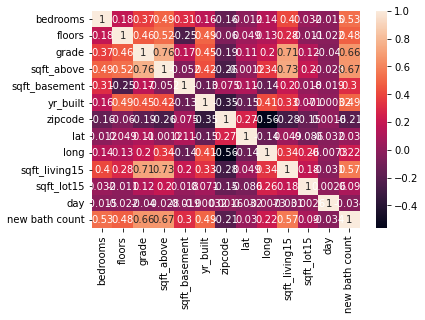

In [145]:
#checking correlation between continuous columns to see if there are any highly related columns that can be dropped (there are not)
cmat = mcon.corr()
sns.heatmap(cmat,annot=True)
plt.show()

# 4. Executing Linear Regression Model

In [146]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(mcon)
x_normalized = transformer.transform(mcon)
print(x_normalized.shape)

(21596, 13)


In [147]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis)
encoded = encoder.transform(mdis).toarray()

In [148]:
encodeddf = pd.DataFrame(encoded)

In [149]:
X = np.concatenate((x_normalized,encodeddf),axis=1)

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [151]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.7045903101936455

### Using a Linear Regression model, we have 70.46% accuracy

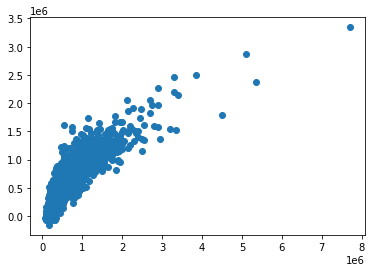

In [55]:
plt.scatter(x=y_test,y=predictions)

# KNeighbors Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(x_train,y_train)
predictions  = model.predict(x_test)
score = model.score(x_test,y_test)
lm = linear_model.LinearRegression()
model1 = lm.fit(x_train,y_train)
r2_score(y_test, predictions)

0.5388044581716877

### Using a KNeighbors Regressor model, we have 53.88% accuracy

# June 2022 Addition: 
# Circling Back With Box Plots For Attempts at Higher Accuracy

## Personal Reminder: look through notes for how to bookmark progress to not have to reexecute everything (Google 'seaborn.barplot')

In [71]:
pd.set_option('display.max_rows', None)

For column  bedrooms
the Upper Limit is: 6.0
the Lower Limit is: 1.0


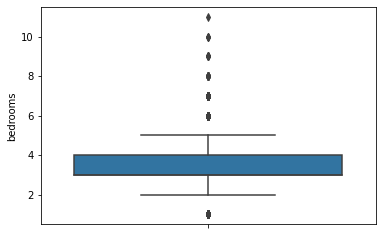

For column  floors
the Upper Limit is: 4.0
the Lower Limit is: -1.0


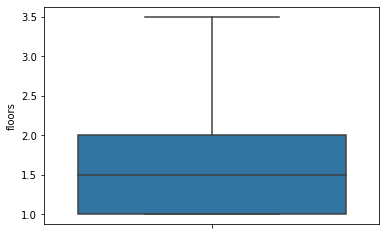

For column  grade
the Upper Limit is: 10.0
the Lower Limit is: 5.0


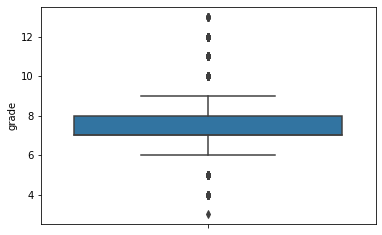

For column  sqft_above
the Upper Limit is: 4250.0
the Lower Limit is: -850.0


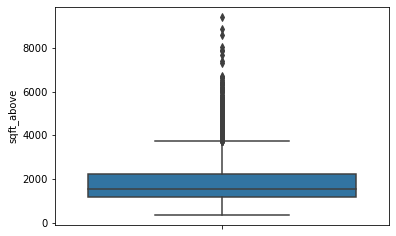

For column  sqft_basement
the Upper Limit is: 1680.0
the Lower Limit is: -1120.0


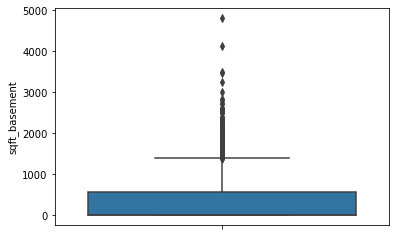

For column  yr_built
the Upper Limit is: 2089.0
the Lower Limit is: 1859.0


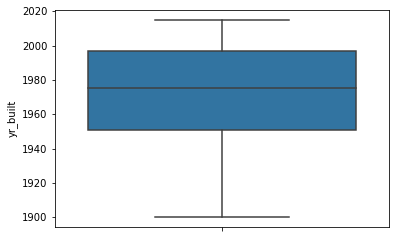

For column  zipcode
the Upper Limit is: 98288.0
the Lower Limit is: 97863.0


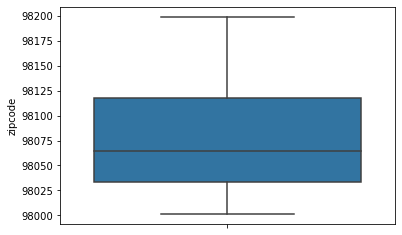

For column  lat
the Upper Limit is: 48.09179999999999
the Lower Limit is: 47.057300000000005


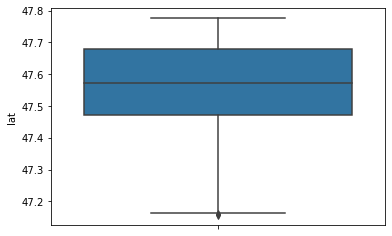

For column  long
the Upper Limit is: -121.719
the Lower Limit is: -122.73400000000001


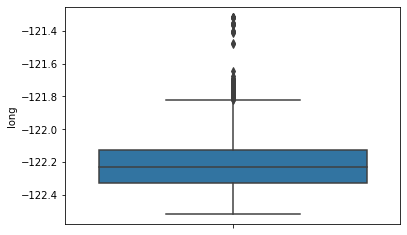

For column  sqft_living15
the Upper Limit is: 4100.0
the Lower Limit is: -250.0


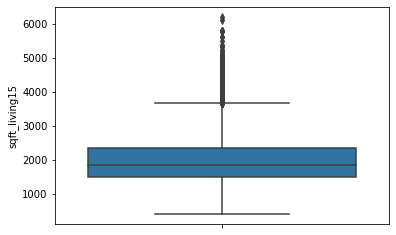

For column  sqft_lot15
the Upper Limit is: 20049.0
the Lower Limit is: -4866.0


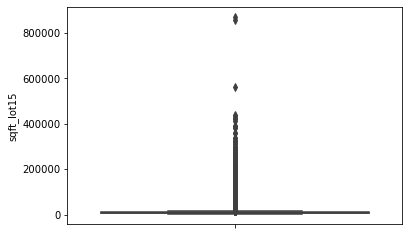

For column  day
the Upper Limit is: 711.0
the Lower Limit is: -339.0


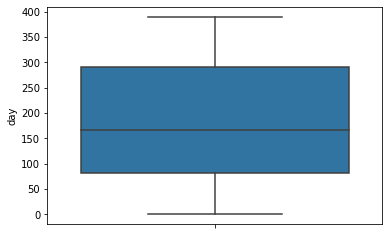

For column  new bath count
the Upper Limit is: 3.5
the Lower Limit is: 1.0


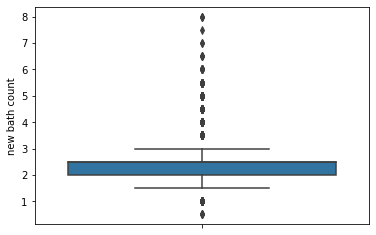

In [152]:
#Applying Boxplots to each significant column
# looking at general stats of each column
for col in mcon.columns:
    print('For column ',col)
    iqr = np.percentile(mcon[col],75) - np.percentile(mcon[col],25)
    upper_limit = np.percentile(mcon[col],75) + 2*iqr
    print('the Upper Limit is:', upper_limit)
    lower_limit = np.percentile(mcon[col],25) - 2*iqr
    print('the Lower Limit is:', lower_limit)
    sns.boxplot(y=mcon[col])
    plt.show()
    
    
    
    


In [73]:
for col in mcon:
    print(mcon[col].value_counts().sort_index())

1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64
1.0    10672
1.5     1910
2.0     8235
2.5      161
3.0      611
3.5        7
Name: floors, dtype: int64
3        1
4       27
5      242
6     2038
7     8973
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64
370       1
380       1
390       1
410       1
420       2
430       1
440       1
460       1
470       2
480       4
490       2
500       2
520       6
530       3
540       2
550       6
560       5
570       5
580      13
590      10
600      12
610       8
620      16
630       8
640       7
650       7
660       9
670      30
680      18
690       9
700      50
710      32
720      77
730      25
740      39
750      40
760      45
765       2
770      67
780      64
790      65
798       2
800      71
806       1
809       1
810      39
820      67
828       1
830      69
833       

In [159]:
moddata.columns

Index(['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'new bath count', 'new reno'],
      dtype='object')

In [158]:
for col in mcon.columns:
    iqr = np.percentile(mcon[col],75) - np.percentile(mcon[col],25)
    upper_limit = np.percentile(mcon[col],75) + 2*iqr
    print('For ',col,' the Upper Limit is:', upper_limit)
    lower_limit = np.percentile(mcon[col],25) - 2*iqr
    print('the Lower Limit is:', lower_limit)
    nmoddata=nmoddata[moddata[col]<upper_limit]
nmoddata.shape

For  bedrooms  the Upper Limit is: 6.0
the Lower Limit is: 1.0
For  floors  the Upper Limit is: 4.0
the Lower Limit is: -1.0
For  grade  the Upper Limit is: 10.0
the Lower Limit is: 5.0
For  sqft_above  the Upper Limit is: 4250.0
the Lower Limit is: -850.0
For  sqft_basement  the Upper Limit is: 1680.0
the Lower Limit is: -1120.0
For  yr_built  the Upper Limit is: 2089.0
the Lower Limit is: 1859.0
For  zipcode  the Upper Limit is: 98288.0
the Lower Limit is: 97863.0
For  lat  the Upper Limit is: 48.09179999999999
the Lower Limit is: 47.057300000000005
For  long  the Upper Limit is: -121.719
the Lower Limit is: -122.73400000000001
For  sqft_living15  the Upper Limit is: 4100.0
the Lower Limit is: -250.0
For  sqft_lot15  the Upper Limit is: 20049.0
the Lower Limit is: -4866.0
For  day  the Upper Limit is: 711.0
the Lower Limit is: -339.0
For  new bath count  the Upper Limit is: 3.5
the Lower Limit is: 1.0


C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/1056957210.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nmoddata=nmoddata[moddata[col]<upper_limit]


(17314, 17)

In [156]:
print(nmoddata.shape, nmoddata.columns)

(19719, 17) Index(['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'new bath count', 'new reno'],
      dtype='object')


In [160]:
target = nmoddata['price']
nmoddata=nmoddata.drop(['price'],axis=1)

KeyError: 'price'

In [92]:
#defining continuous and discrete columns by number of unique values (6, in this case)
def separate(nmoddata,columns):
    nmdata_dis = []
    nmdata_cont = []
    for col in columns:
        if len(nmoddata[col].value_counts())<6:
            print('Col: ',col,' is discrete')
            nmdata_dis.append(col)
        else:
            print('Col: ',col,' is continuous')
            nmdata_cont.append(col)
    return nmdata_dis, nmdata_cont

In [93]:
a,b=separate(nmoddata,nmoddata.columns)

Col:  bedrooms  is continuous
Col:  floors  is continuous
Col:  waterfront  is discrete
Col:  view  is discrete
Col:  condition  is discrete
Col:  grade  is continuous
Col:  sqft_above  is continuous
Col:  sqft_basement  is continuous
Col:  yr_built  is continuous
Col:  zipcode  is continuous
Col:  lat  is continuous
Col:  long  is continuous
Col:  sqft_living15  is continuous
Col:  sqft_lot15  is continuous
Col:  day  is continuous
Col:  new bath count  is continuous
Col:  new reno  is discrete


In [94]:
#discrete values
a

['waterfront', 'view', 'condition', 'new reno']

In [96]:
nmoddata.shape

(19719, 17)

In [97]:
nmdis=nmoddata[a]

In [98]:
nmdis.columns

Index(['waterfront', 'view', 'condition', 'new reno'], dtype='object')

In [99]:
# continuous values
pd.reset_option('display.max_rows')
nmcon=nmoddata[b]
nmcon

,bedrooms,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,new bath count
0,3,1.0,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,164,1.0
1,3,2.0,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,221,2.5
2,2,1.0,6,770,0,1933,98028,47.7379,-122.233,2720,8062,299,1.0
3,4,1.0,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,221,3.0
4,3,1.0,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,292,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3.0,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,19,2.5
21593,4,2.0,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,297,2.5
21594,2,2.0,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,52,1.0
21595,3,2.0,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,259,2.5


# Applying Trimmed Data to Linear Regression Model

In [100]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(nmcon)
x_normalized = transformer.transform(nmcon)
print(x_normalized.shape)

(19719, 13)


In [101]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(nmdis)
encoded = encoder.transform(nmdis).toarray()

In [102]:
encodeddf = pd.DataFrame(encoded)

In [103]:
X = np.concatenate((x_normalized,encodeddf),axis=1)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

ValueError: Found input variables with inconsistent numbers of samples: [19719, 21596]

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

0.7045903101936455

### Using a Linear Regression model, we have 70.46% accuracy

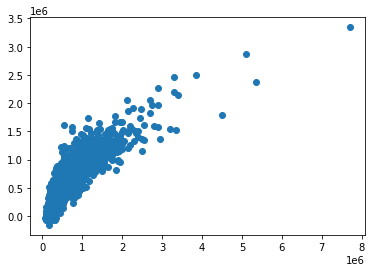

In [55]:
plt.scatter(x=y_test,y=predictions)

In [ ]:
###

# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

new_df = data[data['TIMELAG'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

###